# Regresion Linea: Costo de un incidente de seguridad

En este caso se explican los fundamentos básicos de la regresion lineal aplicada a un caso sencillo relacionado con la Ciberseguridad.

### Enunciado del ejercicio:
El ejercicio consiste en predecir el costo de un incidente de segurirad en base a el numero de equipos que se ven afectados. El DataSet es generado de manera aleatoria.

## 1.- Generacion del DataSet

In [4]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print("La longitud de el DataSet es: ", len(X))

La longitud de el DataSet es:  100


## 2.- Visualizacion del DataSet

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

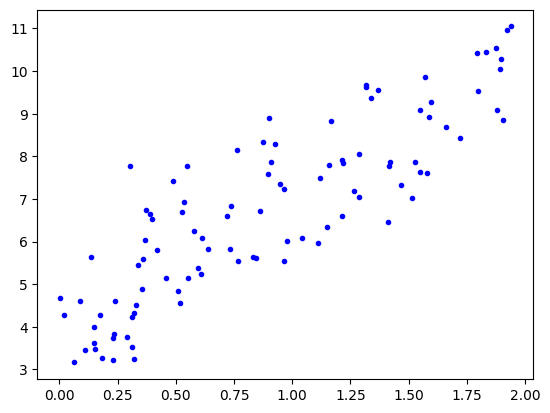

In [7]:
plt.plot(X, y, "b.")
plt.show()

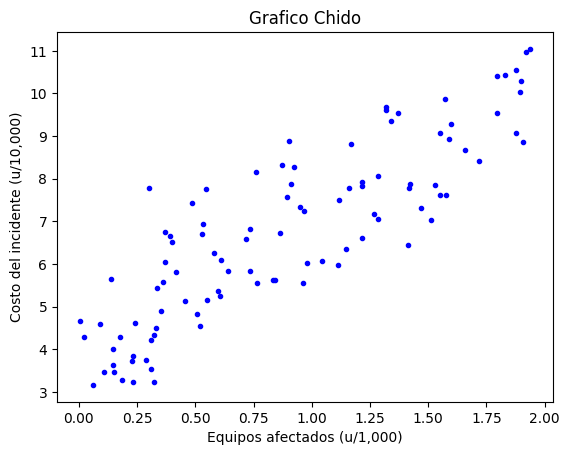

In [8]:
plt.plot(X, y, "b.")
plt.title("Grafico Chido")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

## 3.- Modificacion del DataSet

In [10]:
import pandas as pd
data = {
    'No_Equipos_Afectados': X.flatten(),
    'Costo': y.flatten()
}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.735489,6.829873
1,1.906099,8.853889
2,0.175449,4.289280
3,0.527020,6.702462
4,1.528762,7.857010
5,1.878575,9.078396
6,0.519332,4.555947
7,0.925003,8.282770
8,0.551797,5.149246
9,0.311725,3.535162


In [11]:
# Escalado de numero de equipos afectados.
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalado del costo.
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,735,68298
1,1906,88538
2,175,42892
3,527,67024
4,1528,78570
5,1878,90783
6,519,45559
7,925,82827
8,551,51492
9,311,35351


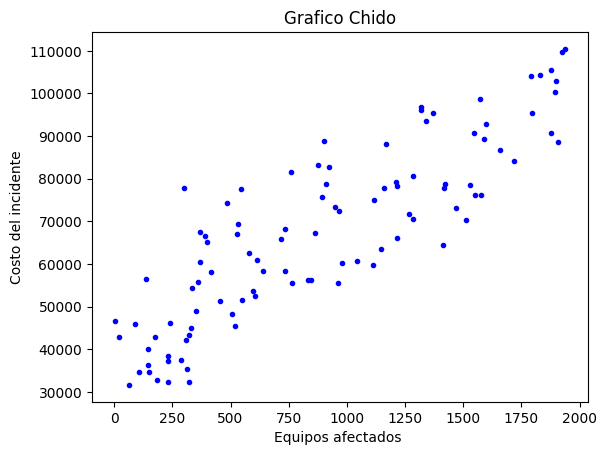

In [12]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.title("Grafico Chido")
plt.xlabel("Equipos afectados ")
plt.ylabel("Costo del incidente")
plt.show()

## 4.- Construccion del modelo

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
# construccion del modelo y ajuste de la hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df["No_Equipos_Afectados"].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [33]:
# Parametro tetha 0
lin_reg.intercept_

np.float64(39716.861695263746)

In [35]:
# Parametro tetha 1
lin_reg.coef_

array([31.18910041])

In [37]:
# Prediccion para el valor minimo y maximo del DataSet
# instalar NLTK, stop words
X_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)

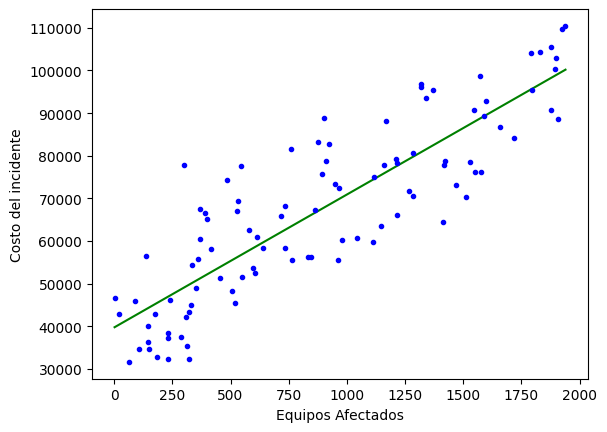

In [41]:
# Representacion grafica de la funcion de hipotesis generada

# Funcion de hipotesis
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 5.- Prediccion de nuevos ejemplos

In [43]:
# Numero de equipos afectados.
X_new = np.array([[1255]])

# Prediccion del costo que tendria el incidente.
Costo = lin_reg.predict(X_new)

print("EL costo de incidente seria: $", int(Costo[0]))

EL costo de incidente seria: $ 78859


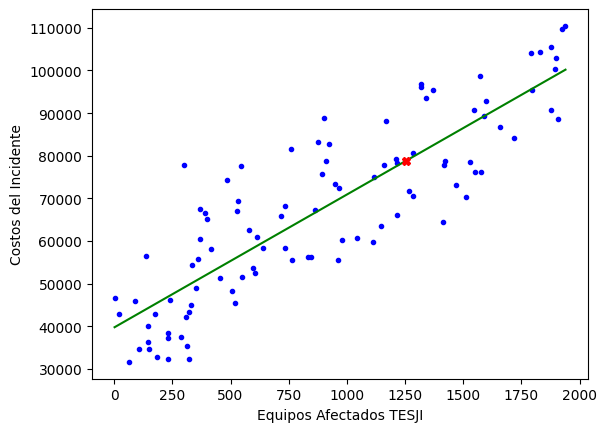

In [47]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(X_new, Costo, "rX")
plt.xlabel("Equipos Afectados TESJI")
plt.ylabel("Costos del Incidente")
plt.show()